In [25]:

from dotenv import load_dotenv
import os
import openai
#import google.generativeai as genai
import base64 
from PIL import Image

In [26]:
# Creating OpenAI API client using openai library
load_dotenv() # Load the environment variables from the .env file
OPENAI_API_KEY = os.getenv("openaikey")
client = openai.OpenAI(api_key= OPENAI_API_KEY) # OpenAI API key

### What is System Prompt, User Prompt and Temperature
## 1. System Prompt
A message that sets the behavior or role of the AI for the entire conversation. It defines how the model should act.
    Example: "You are an expert financial advisor."
## 2. User Prompt
The actual input or query from the user. It asks the AI to respond to specific questions or tasks.
    Example: "What are good investment options?"
## 3. Temperature
Controls the randomness of responses. A lower value (e.g., 0.1) makes answers more focused and deterministic, while a higher value (e.g., 0.8) makes them more creative.

In [31]:
#SIMPLE USE OF CHATGPT with text input and text output
system_message = "You are an AI Expert"
user_prompt = "give me report on evolution of Gen AI."
response = client.chat.completions.create(
            model="gpt-4o-mini",  # Ensure you're using the correct model name
            messages=[
                {"role": "system", "content": system_message},  # System message for context
                {"role": "user", "content": user_prompt}  # User's input message
            ],
            max_tokens= 9000,  # Limit the response length
            temperature=0.7  # Adjust creativity level (0.0 - 1.0)
        )

out = response.choices[0].message.content
print(out)  # Output the response message


### Report on the Evolution of Generative AI

#### Introduction
Generative AI refers to a class of artificial intelligence algorithms that can generate new content, data, or information similar to a given dataset. This technology has evolved significantly over the past few decades, driven by advances in machine learning, particularly deep learning, and the availability of vast amounts of data. This report outlines the key milestones in the evolution of generative AI, its current state, and future directions.

#### Historical Background

1. **Early Developments (1950s - 1990s)**
   - **Algorithmic Foundations**: The roots of generative AI can be traced back to early computational models and algorithms. In the 1950s, Alan Turing's work laid the groundwork for machine intelligence. The development of probabilistic models like Hidden Markov Models (HMMs) in the 1980s enabled early generative tasks in speech and language processing.
   - **Symbolic AI**: In the 1960s and 1970s, symbolic AI 

### Image analysis using GPT-4  allows the model to interpret and process visual inputs like images. Key features include:

## Object Detection: 
Identifies and classifies objects in images.
## Text Recognition (OCR): 
Extracts and reads text from images.
## Scene Understanding: 
Describes complex scenes and spatial relationships.
## Data Interpretation: 
Analyzes visual data like graphs or charts.

Applications include medical imaging, accessibility for the visually impaired, and creative design. It combines visual understanding with text generation for versatile use cases.

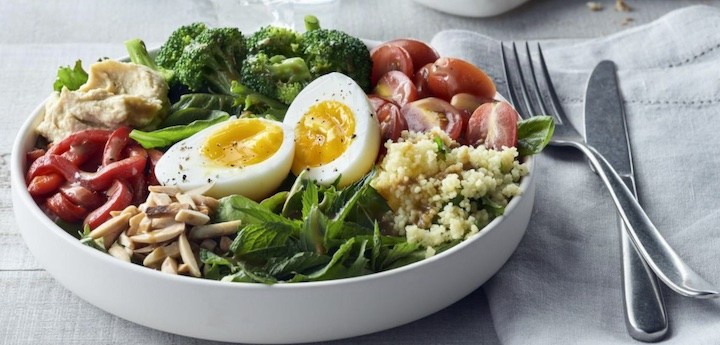

In [32]:
#IMAGE ANALYSIS
image_path = "food_pic.jpg"
#image_path = "iet_page_screenshot.jpg" #from https://www.ietlucknow.ac.in/
image = Image.open(image_path)
# Display the image
display(image)

In [33]:
def encode_image(image_path):
  with open(image_path, 'rb') as image_file:
            return base64.b64encode(image_file.read()).decode("utf-8")

system_prompt_content= system_prompt_content= "You are a dietician with wide knowlege about food items."
user_prompt_content = "List individual food items in the image. Tell if it is healthy or not."

# system_prompt_content= system_prompt_content= "You are an AI assistant  have good knowledge about companies in India and outside."
# user_prompt_content = "Look at rhe dcreenshot of the IET page and tell me which recruiters comanies are listed. Provide 1 line description of each."


#Function to generate the response
base64_image = encode_image(image_path)

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
          {
          "role": "system",
          "content": system_prompt_content
      },
      {
        "role": "user",
        "content": [
          {"type": "text", "text": user_prompt_content },
          {
            "type": "image_url",
            "image_url": {
            "url":  f"data:image/jpeg;base64,{base64_image}",

            },
          },
        ],
      }
    ],
    temperature = 0,
    max_tokens=5000,
  ) 

out = response.choices[0].message.content
print(out)  # Output the response message


Here are the individual food items in the image along with their health assessments:

1. **Broccoli**: Healthy - Rich in vitamins, minerals, and fiber.
2. **Cherry tomatoes**: Healthy - Low in calories and high in vitamins C and K.
3. **Hard-boiled eggs**: Healthy - Good source of protein and healthy fats.
4. **Red bell peppers**: Healthy - High in vitamins A and C, and antioxidants.
5. **Hummus**: Healthy - Made from chickpeas, it provides protein and healthy fats.
6. **Almonds**: Healthy - Good source of healthy fats, protein, and fiber.
7. **Mixed greens (lettuce, spinach, etc.)**: Healthy - Low in calories and high in nutrients.
8. **Couscous**: Moderately healthy - Provides carbohydrates; whole grain options are healthier.

Overall, this meal is quite healthy, featuring a variety of nutrient-dense foods.


## Image generation using DALL-E 3 refers to the process of creating digital images from text prompts using OpenAI's DALL-E 3 model. 
It is a state-of-the-art text-to-image AI model that significantly improves upon its predecessors (DALL-E 1 and 2) in terms of image quality, prompt accuracy, and artistic adaptability.

In [30]:
#Image genearation
response = client.images.generate(
  model="dall-e-3",
  prompt='''Create an image of engineering college named as "IET"  equipped  with mordern amenities.  Make sure the image is of high quality and \
  and realistic. The name "IET" should be clearly visibile. The campus should be mordern but very grean and eco-friendly. \
  The building design should be inspired by Stanford University. The campus should have a lot of trees and plants. ''',
  size="1024x1024",
  quality="standard",
  n=1,
)

image_url = response.data[0].url
image_url 


'https://oaidalleapiprodscus.blob.core.windows.net/private/org-g8aRaTGcWtxbZfKBJI8IGcfA/user-5m2zW0ezeH0H5In8pLLTpaRR/img-ZCW0w5uWiYPcM5yic8hWqc3V.png?st=2024-11-13T11%3A52%3A20Z&se=2024-11-13T13%3A52%3A20Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=d505667d-d6c1-4a0a-bac7-5c84a87759f8&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-11-12T20%3A02%3A28Z&ske=2024-11-13T20%3A02%3A28Z&sks=b&skv=2024-08-04&sig=WuzK25vty/NohAbZwuRznMaJguv9d/Mgq8SwkRiQC3M%3D'